## **Model predicting Urban Heat Island**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Extracting the latitude and longitues

In [5]:
uhi = pd.read_csv(r"C:\Users\levie\OneDrive\Desktop\Year 5\project\dataset\uhi_train_data.csv")

In [7]:
uhi.head()

,system:index,EMM,FV,LST,Map,NDVI,SUHI,class,latitude,longitude,.geo
0,1_1_1_1_1_1_1_1_1_2_4_0,0.986155,0.038773,25.580477,0,0.010890,-4.706425,10,-4.070850,39.659497,"{""type"":""Point"",""coordinates"":[39.659496899771..."
1,1_1_1_1_1_1_1_1_1_2_5_0,0.987796,0.449091,26.098571,0,0.152179,-4.188331,10,-4.038511,39.650604,"{""type"":""Point"",""coordinates"":[39.650603578458..."
2,1_1_1_1_1_1_1_1_1_2_7_0,0.988868,0.716922,26.837716,0,0.244405,-3.449186,10,-4.078127,39.667043,"{""type"":""Point"",""coordinates"":[39.667042748158..."
3,1_1_1_1_1_1_1_1_1_2_9_0,0.988098,0.524561,28.114125,0,0.178167,-2.172777,10,-4.074354,39.672972,"{""type"":""Point"",""coordinates"":[39.672971629033..."
4,1_1_1_1_1_1_1_1_1_2_10_0,0.987846,0.461603,29.999903,0,0.156488,-0.286999,10,-4.060879,39.654377,"{""type"":""Point"",""coordinates"":[39.654376502652..."


In [8]:
uhi.isnull().sum()

system:index    0
EMM             0
FV              0
LST             0
Map             0
NDVI            0
SUHI            0
class           0
latitude        0
longitude       0
.geo            0
dtype: int64

In [9]:
uhi.dtypes

system:index     object
EMM             float64
FV              float64
LST             float64
Map               int64
NDVI            float64
SUHI            float64
class             int64
latitude        float64
longitude       float64
.geo             object
dtype: object

In [10]:
uhi = uhi.drop(['system:index','Map','.geo','latitude','longitude'],axis = 1)

In [12]:
#Training features for SUHI
independent_features = uhi.drop(['SUHI'],axis=1)
dependent_features = uhi['SUHI']

#Training features for LULC
features = uhi.drop(['class'],axis=1)
targets = uhi['class']
print(independent_features.shape)

(1340, 5)


We use RandomForestClasify to classify UHI hotspot areas<br>
We use RandomForestRegressor to predict UHI


In [13]:
#Splitting the dataets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(independent_features,dependent_features,test_size=0.3,random_state=100)
X_train_class,X_test_class,y_train_class,y_test_class = train_test_split(features,targets,test_size=0.3,random_state=100)

In [14]:
# Standardize the values for the regressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

#Standardize values of the clasifier
X_train_scaled1 = scale.fit_transform(X_train_class)
X_test_scaled1 = scale.fit_transform(X_test_class)

In [15]:
#Fitting the model for training
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [16]:
#Random forest regressor-UHI prediction
rfr.fit(X_train_scaled,y_train)
y_pred = rfr.predict(X_test_scaled)

In [17]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Evaluating model performance
def model_perform (y_p,y_t):
    mae = mean_absolute_error(y_p,y_t)
    mse = mean_squared_error(y_p,y_t)
    r2 = r2_score(y_p,y_t)
    print(f"The mean absolute error is:{mae:.3f}")
    print(f"The mean squared error is:{mse:.3f}")
    print(f"R2:{r2:.3f}")
model_eval = model_perform(y_pred,y_test)
print(model_eval)

The mean absolute error is:0.039
The mean squared error is:0.002
R2:0.999
None


### Saving the model


In [18]:
import pickle
filename = "UHI_model.sav"
pickle.dump(rfr, open(filename, 'wb'))

### Using random forest classifier to classify UHI

In [19]:
uhi_data = uhi
uhi_data.head(2)

,EMM,FV,LST,NDVI,SUHI,class
0,0.986155,0.038773,25.580477,0.010890,-4.706425,10
1,0.987796,0.449091,26.098571,0.152179,-4.188331,10


In [20]:
# Define risk categories based on LST
def classify_risk(lst):
    if lst > 35:
        return "High Risk"
    elif 30 <= lst <= 35:
        return "Moderate Risk"
    else:
        return "Low Risk"

# Apply classification function
uhi_data["Risk_Level"] = uhi_data["LST"].apply(classify_risk)

In [21]:
# Encode risk levels as numerical labels
risk_mapping = {"Low Risk": 0, "Moderate Risk": 1, "High Risk": 2}
uhi_data["Risk_Label"] = uhi_data["Risk_Level"].map(risk_mapping)

In [23]:
# Select features and target variable
features = ["NDVI", "EMM", "class", "SUHI","FV"]  # Modify with available features
X_1 = uhi_data[features]
y_1 = uhi_data["Risk_Label"]

In [24]:
#Training dataset
from sklearn.model_selection import train_test_split
X_train_class,X_test_class,y_train_class,y_test_class = train_test_split(X_1,y_1,test_size=0.2,random_state=42)

In [25]:
# Train a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [26]:
# Predict on test data
y_pred_class = clf.predict(X_test_class)

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
# Evaluate model performance
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test_class, y_pred_class))

Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       195

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



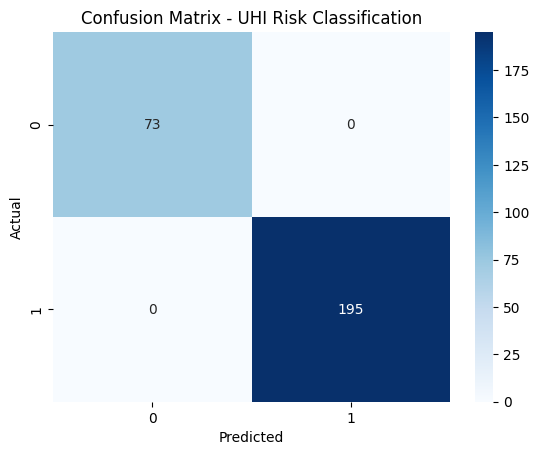

In [29]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - UHI Risk Classification")
plt.show()

### Saving the model

In [30]:
import pickle
filename = "UHI_classify.sav"
pickle.dump(clf, open(filename, 'wb'))

### Converting shp to geojson

In [3]:
import json
import geopandas as gpd

In [ ]:
def load_shapefile():
    """ Load county boundaries from a local Shapefile and convert to GeoJSON. """
    shapefile_path = "C:/Users/levie/OneDrive/Desktop/Year 5/5.2/Carto map design/ken_adm_iebc_20191031_shp/ken_admbnda_adm2_iebc_20191031.shp"
    gdf = gpd.read_file(shapefile_path)  # Read the Shapefile
      # Convert all Timestamp columns to strings to avoid serialization errors
    for col in gdf.columns:
        if gdf[col].dtype == "datetime64[ns]":
            gdf[col] = gdf[col].astype(str)

    return json.loads(gdf.to_json())  # Convert to GeoJSON

# Load county boundaries
county_geojson = load_shapefile()

In [ ]:

 #Load county boundaries from a Shapefile and convert to GeoJSON. """
shapefile_path = "C:/Users/levie/OneDrive/Desktop/Year 5/5.2/Carto map design/ken_adm_iebc_20191031_shp/ken_admbnda_adm2_iebc_20191031.shp"
gdf = gpd.read_file(shapefile_path)  # Load the shapefile

    # Ensure all datetime columns are converted to strings
for col in gdf.columns:
    if gdf[col].dtype == "datetime64[ms]":
        gdf[col] = gdf[col].astype(str)

    # Ensure index is reset before converting to JSON
gdf = gdf.reset_index(drop=True)
print(gdf.dtypes)

# Convert the GeoDataFrame to GeoJSON format
geojson_data = json.loads(gdf.to_json())

print(geojson_data)

# Load the shapefile
county_geojson = load_shapefile()


Shape_Leng     float64
Shape_Area     float64
ADM2_EN         object
ADM2_PCODE      object
ADM2_REF        object
ADM2ALT1EN      object
ADM2ALT2EN      object
ADM1_EN         object
ADM1_PCODE      object
ADM0_EN         object
ADM0_PCODE      object
date            object
validOn         object
ValidTo         object
geometry      geometry
dtype: object
